<a href="https://colab.research.google.com/github/abosedealli/Stockprediction/blob/main/ARIMA-HIGH%20%20VALUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
!pip install tensorflow
import tensorflow as tf
import random
!pip inatall pandas 
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "inatall" - maybe you meant "install"


In [16]:
x = pd.read_csv("/content/appledataset.csv")

In [17]:
x['Date'] = pd.to_datetime(x['Date'])
x.set_index('Date',inplace=True)
x = x[['High','Low','Open','Close']]
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10100 entries, 1980-12-12 to 2020-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    10100 non-null  float64
 1   Low     10100 non-null  float64
 2   Open    10100 non-null  float64
 3   Close   10100 non-null  float64
dtypes: float64(4)
memory usage: 394.5 KB


In [18]:
data = x.iloc[:int(0.8*len(x))]
print(data.shape)

(8080, 4)


In [19]:
testdata = x.iloc[int(0.8*len(x)):]
print(testdata.shape)

(2020, 4)


In [20]:
data

,High,Low,Open,Close
Date,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348
1980-12-15,0.122210,0.121652,0.122210,0.121652
1980-12-16,0.113281,0.112723,0.113281,0.112723
1980-12-17,0.116071,0.115513,0.115513,0.115513
1980-12-18,0.119420,0.118862,0.118862,0.118862
...,...,...,...,...
2012-12-17,18.571428,17.901072,18.176071,18.529642
2012-12-18,19.103571,18.580357,18.750000,19.067858
2012-12-19,19.060715,18.767857,18.981071,18.796785


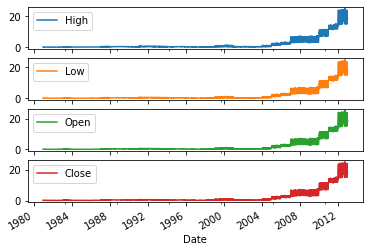

In [21]:
import matplotlib.pyplot as plt

data.plot(subplots=True)
plt.show()

In [22]:
model = pm.auto_arima(data
                      ['Close'], 
                        m=4, seasonal=True,
                      start_p=1, start_q=1, max_order=2, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=-15640.036, Time=7.69 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=-15619.557, Time=0.52 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=-15644.678, Time=1.93 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=-15645.550, Time=2.48 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=-15616.599, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=-15617.775, Time=0.64 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=-15643.646, Time=9.27 sec
 ARIMA(0,1,1)(0,0,2)[4] intercept   : AIC=-15644.996, Time=5.32 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=-15644.687, Time=1.79 sec
 ARIMA(0,1,1)(1,0,2)[4] intercept   : AIC=-15646.732, Time=16.22 sec
 ARIMA(0,1,1)(2,0,2)[4] intercept   : AIC=-15649.529, Time=6.15 sec
 ARIMA(0,1,1)(2,0,1)[4] intercept   : AIC=-15642.072, Time=11.86 sec
 ARIMA(0,1,0)(2,0,2)[4] intercept   : AIC=-15652.530, Time=12.86 sec
 ARIMA(0,1,0)(1,0,2)[4] intercept   : AIC=-15648.351, Time=10.77 sec
 

In [23]:
model.fit(data['Close'])

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 0, 2, 4),
      suppress_warnings=True)

In [24]:
forecast=model.predict(n_periods=len(testdata), return_conf_int=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [25]:
forecast_df = pd.DataFrame()
forecast_df['Prediction'] = forecast[0]
forecast_df.set_index(testdata.index,inplace=True)

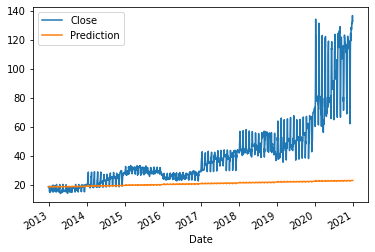

In [26]:
time = pd.concat([testdata['Close'],forecast_df],axis=1)
time.replace([np.inf, -np.inf], np.nan, inplace=True)
time.dropna(inplace=True)
time.plot()

In [27]:
time

,Close,Prediction
Date,,
2012-12-24,18.577499,18.600517
2012-12-26,18.321428,18.565182
2012-12-27,18.395000,18.552171
2012-12-28,18.199642,18.552966
2012-12-31,19.006071,18.562769
...,...,...
2020-12-24,131.970001,22.969243
2020-12-28,136.690002,22.971490
2020-12-29,134.869995,22.973737
